<a href="https://colab.research.google.com/github/minsuk-heo/tf2/blob/master/jupyter_notebooks/05.MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
# softmax practice
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
scores = [1, 7, 2, 1, 1, 1, 1, 3, 1, 1]
print(softmax(scores))

[0.00237792 0.95932017 0.00646385 0.00237792 0.00237792 0.00237792
 0.00237792 0.01757056 0.00237792 0.00237792]


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.random.set_seed(1)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# Get MNIST Data

In [72]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [73]:
print(x_train.shape)

(60000, 28, 28)


In [74]:
print(y_test.shape)

(10000,)


In [75]:
print(x_train[1][20][6])

0.33333334


# MLP Model for classifiation

In [76]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # reshape 28 row * 28 column data to 28*28 rows
model.add(Dense(256, activation='sigmoid'))    
model.add(Dense(128, activation='sigmoid')) # dense layer 2
model.add(Dense(10, activation='softmax'))  # dense layer 3


In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Train

In [81]:
hist=model.fit(x_train, y_train, epochs=10, batch_size=2000, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 17us/sample - loss: 2.0674 - accuracy: 0.3967 - val_loss: 1.7127 - val_accuracy: 0.6821
Epoch 2/10
48000/48000 [==============================] - 0s 8us/sample - loss: 1.3867 - accuracy: 0.7040 - val_loss: 1.0389 - val_accuracy: 0.7797
Epoch 3/10
48000/48000 [==============================] - 0s 8us/sample - loss: 0.8748 - accuracy: 0.8023 - val_loss: 0.6824 - val_accuracy: 0.8586
Epoch 4/10
48000/48000 [==============================] - 0s 9us/sample - loss: 0.6164 - accuracy: 0.8600 - val_loss: 0.5023 - val_accuracy: 0.8883
Epoch 5/10
48000/48000 [==============================] - 0s 8us/sample - loss: 0.4780 - accuracy: 0.8860 - val_loss: 0.4047 - val_accuracy: 0.9024
Epoch 6/10
48000/48000 [==============================] - 0s 8us/sample - loss: 0.4004 - accuracy: 0.8983 - val_loss: 0.3517 - val_accuracy: 0.9091
Epoch 7/10
48000/48000 [==============================] - 0s 

# Test

In [82]:
results = model.evaluate(x_test,  y_test,verbose = 0)

In [83]:
print('test loss, test acc:', results)

test loss, test acc: [0.2665602934896946, 0.9255]


In [84]:
model.predict(x_test)

array([[6.1090372e-04, 2.7607082e-04, 9.9241908e-04, ..., 9.9016917e-01,
        1.7622203e-04, 4.3116347e-03],
       [4.6748216e-03, 5.8838371e-03, 9.5180643e-01, ..., 3.8166461e-05,
        4.3326290e-03, 8.6776919e-05],
       [8.0823738e-05, 9.7484517e-01, 7.6867719e-03, ..., 5.1916349e-03,
        2.6341886e-03, 1.1230874e-03],
       ...,
       [6.7888803e-05, 1.2027514e-03, 6.6704955e-04, ..., 4.2349976e-03,
        9.8447632e-03, 7.3631071e-02],
       [1.8848387e-03, 2.1653238e-03, 7.8243727e-04, ..., 3.6682939e-04,
        1.1480191e-01, 3.3474495e-04],
       [1.2036589e-03, 3.1587301e-04, 1.8051922e-03, ..., 3.0708612e-05,
        7.9334961e-05, 6.3913125e-05]], dtype=float32)

In [64]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(784, 256) dtype=float32, numpy=
array([[-0.05087027,  0.06098938,  0.0198964 , ...,  0.00188395,
         0.02735402, -0.05244568],
       [-0.03088946,  0.03645992,  0.05406313, ...,  0.01317755,
        -0.04286024, -0.06785275],
       [-0.05742106, -0.04684889, -0.0629202 , ...,  0.02300072,
        -0.00512099, -0.0274822 ],
       ...,
       [ 0.04123557,  0.02135414,  0.04907781, ..., -0.04102425,
        -0.00077882,  0.05305274],
       [-0.00531389, -0.05305535,  0.06963596, ...,  0.00513488,
         0.01560087,  0.04582444],
       [-0.00873969, -0.06721476,  0.04295109, ..., -0.04448083,
         0.02010446,  0.03320529]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(256,) dtype=float32, numpy=
array([ 3.43957953e-02,  1.30763113e-01, -1.32910892e-01, -4.82071750e-02,
        2.24118046e-02,  2.64114570e-02,  1.68026716e-01, -6.25939444e-02,
       -1.38794303e-01,  1.03710899e-02,  8.37708935e-02,  9.37621370e-02,
       -1.25

In [85]:
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import normalize

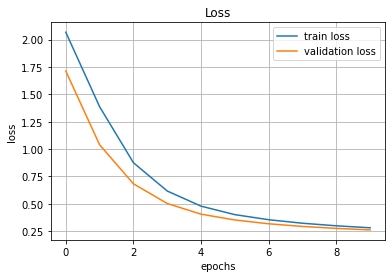

In [86]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

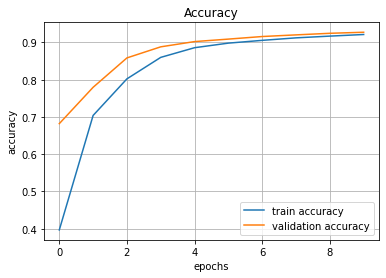

In [87]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()